In [8]:
! pip install diffusers transformers accelerate safetensors

In [9]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device", device)

Using device cuda


In [11]:
model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype = torch.float16
)

pipe = pipe.to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

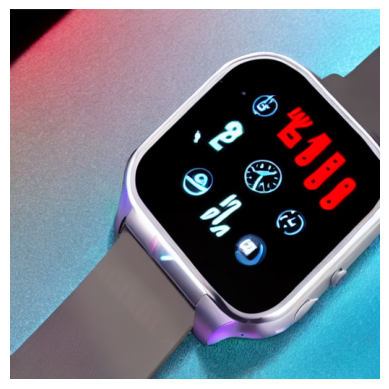

In [12]:
# Text prompt
prompt = "A futuristic product advertisement of a smartwatch with neon lights, ultra realistic, high quality"

# Generate image
image = pipe(prompt).images[0]

# Show image
plt.imshow(image)
plt.axis("off")
plt.show()

# Save image
image.save("product_ad.png")


  0%|          | 0/50 [00:00<?, ?it/s]

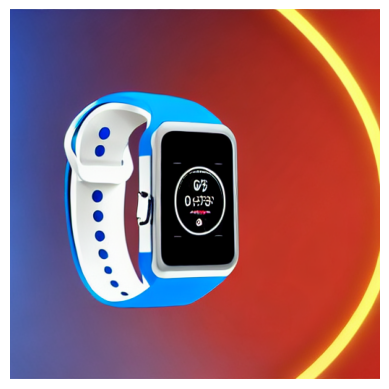

In [13]:
image = pipe(
    prompt,
    negative_prompt = "blurry,low quality,distorted"
).images[0]

plt.imshow(image)
plt.axis("off")
plt.show()

In [14]:
!pip install gradio

import gradio as gr

def generate_image(prompt):
    image = pipe(prompt).images[0]
    return image

# Launch Gradio app
demo = gr.Interface(
    fn=generate_image,
    inputs="text",
    outputs="image",
    title="Text-to-Image Generator",
    description="Enter any text and get a generated image using Stable Diffusion"
)

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d04f84550de71e35be.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
